<a href="https://colab.research.google.com/github/m-l-kang/cs-178-proj/blob/main/analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# load libraries
import pandas as pd
import numpy as np
import pickle
import os
from google.colab import drive
drive.mount('/content/drive')
# drive.mount('/content/drive', force_remount = True)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import torchvision
seed = 1234

Mounted at /content/drive


In [ ]:
data_path = '/content/drive/MyDrive/cs_178_project/data/cifar-10-batches-py'

# https://github.com/deep-diver/CIFAR10-img-classification-tensorflow/blob/master/CIFAR10_image_classification.py
def load_label_names():
    return ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def load_cfar10_batch(cifar10_dataset_folder_path, batch_id):
    with open(cifar10_dataset_folder_path + '/data_batch_' + str(batch_id), mode='rb') as file:
        # note the encoding type is 'latin1'
        batch = pickle.load(file, encoding='latin1')

    features = batch['data'].reshape((len(batch['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
    labels = batch['labels']

    return features, labels

def load_cfar10_test(cifar10_dataset_folder_path):
  with open(cifar10_dataset_folder_path + '/test_batch', mode = 'rb') as file:
    test = pickle.load(file, encoding = 'latin1')

  features = test['data'].reshape((len(test['data']), 3, 32, 32)).transpose(0, 2, 3, 1)
  labels = test['labels']

  return features, labels
   

def display_stats(cifar10_dataset_folder_path, batch_id, sample_id):
    features, labels = load_cfar10_batch(cifar10_dataset_folder_path, batch_id)

    if not (0 <= sample_id < len(features)):
        print('{} samples in batch {}.  {} is out of range.'.format(len(features), batch_id, sample_id))
        return None

    print('\nStats of batch #{}:'.format(batch_id))
    print('# of Samples: {}\n'.format(len(features)))

    label_names = load_label_names()
    label_counts = dict(zip(*np.unique(labels, return_counts=True)))
    for key, value in label_counts.items():
        print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))

    sample_image = features[sample_id]
    sample_label = labels[sample_id]

    print('\nExample of Image {}:'.format(sample_id))
    print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
    print('Image - Shape: {}'.format(sample_image.shape))
    print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))



In [ ]:
batch_1 = load_cfar10_batch(data_path, 1)
batch_2 = load_cfar10_batch(data_path, 2)
batch_3 = load_cfar10_batch(data_path, 3)
batch_4 = load_cfar10_batch(data_path, 4)
batch_5 = load_cfar10_batch(data_path, 5)

final_test_set = load_cfar10_test(data_path)


In [ ]:
# large data set
all_features = np.concatenate((batch_1[0], batch_2[0], batch_3[0], batch_4[0], batch_5[0]))
all_labels = np.concatenate((batch_1[1], batch_2[1], batch_3[1], batch_4[1], batch_5[1]))

features, labels = all_features, all_labels

print('# of Samples: {}\n'.format(len(features)))

label_names = load_label_names()
label_counts = dict(zip(*np.unique(labels, return_counts=True)))
for key, value in label_counts.items():
    print('Label Counts of [{}]({}) : {}'.format(key, label_names[key].upper(), value))

sample_image = features[1]
sample_label = labels[1]

print('\nExample of Image {}:'.format(1))
print('Image - Min Value: {} Max Value: {}'.format(sample_image.min(), sample_image.max()))
print('Image - Shape: {}'.format(sample_image.shape))
print('Label - Label Id: {} Name: {}'.format(sample_label, label_names[sample_label]))

# of Samples: 50000

Label Counts of [0](AIRPLANE) : 5000
Label Counts of [1](AUTOMOBILE) : 5000
Label Counts of [2](BIRD) : 5000
Label Counts of [3](CAT) : 5000
Label Counts of [4](DEER) : 5000
Label Counts of [5](DOG) : 5000
Label Counts of [6](FROG) : 5000
Label Counts of [7](HORSE) : 5000
Label Counts of [8](SHIP) : 5000
Label Counts of [9](TRUCK) : 5000

Example of Image 1:
Image - Min Value: 5 Max Value: 254
Image - Shape: (32, 32, 3)
Label - Label Id: 9 Name: truck


In [ ]:
display_stats(data_path, 1, 5)
display_stats(data_path, 2, 3)
display_stats(data_path, 3, 4)
display_stats(data_path, 4, 8)
display_stats(data_path, 5, 1)


Stats of batch #1:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 1005
Label Counts of [1](AUTOMOBILE) : 974
Label Counts of [2](BIRD) : 1032
Label Counts of [3](CAT) : 1016
Label Counts of [4](DEER) : 999
Label Counts of [5](DOG) : 937
Label Counts of [6](FROG) : 1030
Label Counts of [7](HORSE) : 1001
Label Counts of [8](SHIP) : 1025
Label Counts of [9](TRUCK) : 981

Example of Image 5:
Image - Min Value: 0 Max Value: 252
Image - Shape: (32, 32, 3)
Label - Label Id: 1 Name: automobile

Stats of batch #2:
# of Samples: 10000

Label Counts of [0](AIRPLANE) : 984
Label Counts of [1](AUTOMOBILE) : 1007
Label Counts of [2](BIRD) : 1010
Label Counts of [3](CAT) : 995
Label Counts of [4](DEER) : 1010
Label Counts of [5](DOG) : 988
Label Counts of [6](FROG) : 1008
Label Counts of [7](HORSE) : 1026
Label Counts of [8](SHIP) : 987
Label Counts of [9](TRUCK) : 985

Example of Image 3:
Image - Min Value: 4 Max Value: 255
Image - Shape: (32, 32, 3)
Label - Label Id: 8 Name: ship

Stats of b

<BarContainer object of 10 artists>

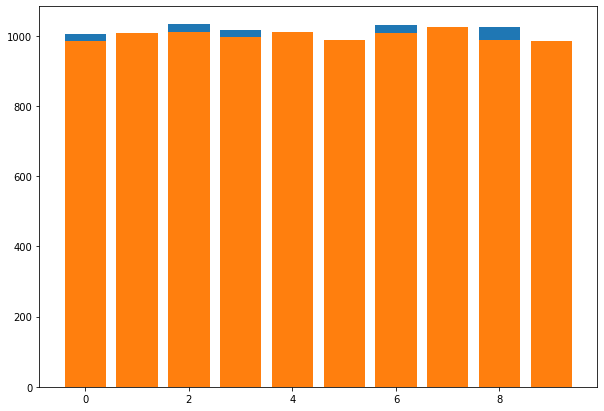

In [ ]:
# distribution of lables in the data sets
fig, ax = plt.subplots(figsize=(10, 7))

batch_1_labels = dict(zip(*np.unique(batch_1[1], return_counts=True)))
plt.bar(batch_1_labels.keys(), batch_1_labels.values())

batch_2_labels = dict(zip(*np.unique(batch_2[1], return_counts=True)))
plt.bar(batch_2_labels.keys(), batch_2_labels.values())



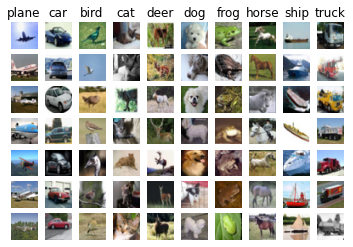

In [ ]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(batch_1[0], batch_1[1], test_size = 0.2, random_state = seed)

classes = ['plane', 'car', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
num_classes = len(classes)
samples_per_class = 7
for y, cls in enumerate(classes):
    idxs = [i for i in range(len(y_train1)) if y_train1[i] == y]
    idxs = np.random.choice(idxs, samples_per_class, replace=False)
    for i, idx in enumerate(idxs):
        plt_idx = i * num_classes + y + 1
        plt.subplot(samples_per_class, num_classes, plt_idx)
        plt.imshow(X_train1[idx].astype('uint8'))
        plt.axis('off') 
        if i == 0:
            plt.title(cls)
plt.show()


In [ ]:
# End of EDA

In [ ]:
X_tr_all, X_te_all, y_tr_all, y_te_all = train_test_split(all_features, all_labels, test_size = 0.2, random_state = seed)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import KFold
from keras.utils.np_utils import to_categorical 
from sklearn.linear_model import LogisticRegression

In [ ]:
#y_tr_all = to_categorical(y_tr_all, num_classes=10)
#y_te_all = to_categorical(y_te_all, num_classes=10)
# Transform images from (32,32,3) to 3072-dimensional vectors (32323)
X_te_final = final_test_set[0]
y_te_final = np.asarray(final_test_set[1])

X_tr_all_not_shaped = X_tr_all
X_te_final_not_shaped = X_te_final

X_tr_all = np.reshape(X_tr_all,(40000,3072))
X_te_all = np.reshape(X_te_all,(10000,3072))
X_tr_all = X_tr_all.astype('float32')
X_te_all = X_te_all.astype('float32')
# Normalization of pixel values (to [0-1] range)
X_tr_all /= 255
X_te_all /= 255

#X_tr_all = X_tr_all[:400]
#X_te_all = X_te_all[:100]
#y_tr_all = y_tr_all[:400]
#y_te_all = y_te_all[:100]
print("Shape of training data:")
print(X_tr_all.shape)
print(y_tr_all.shape)
print("Shape of test data:")
print(X_te_all.shape)
print(y_te_all.shape)


Shape of training data:
(40000, 3072)
(40000,)
Shape of test data:
(10000, 3072)
(10000,)


In [ ]:
# kNN classifier
k_vals = [1, 5, 10, 50, 100] 


for i, k in enumerate(k_vals): 
    knn = KNeighborsClassifier(n_neighbors=k) 
    knn.fit(X_tr_all,y_tr_all) 

    knn_predict_train = knn.predict(X_tr_all)
    knn_predict_test = knn.predict(X_te_all)

    knn_acc_train = accuracy_score(y_tr_all,knn_predict_train)
    knn_acc_test = accuracy_score(y_te_all,knn_predict_test)

    print(f'Sklearn Results for ', k) 
    print(f'--- Accuracy (train): {knn_acc_train}') 
    print(f'--- Accuracy (test): {knn_acc_test}')

    sklearn_cm = confusion_matrix(y_te_all, 
                                  knn_predict_test)     
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)     
    sklearn_disp.plot();

  # confusion_matrix(
    #y_test.values.argmax(axis=1), predictions.argmax(axis=1))


In [ ]:
def accuracy_vs_reg(X_tr, y_tr, X_te, y_te):

  # log initialization
  coefs_ = []
  train_accuracies = []
  test_accuracies = []
  cs = [0, 0.1, 1, 10, 50]
  ### YOUR CODE STARTS HERE ###

  for c in cs:
    # Specify the logistic classifier model
    if c == 0:
      classifier = LogisticRegression(penalty='none', solver = 'saga', max_iter = 300, fit_intercept=True)
    else:
      classifier = LogisticRegression(penalty='l1', C = c, solver = 'saga', max_iter = 300, fit_intercept=True)
    
    classifier.fit(X_tr, y_tr)
  
    train_predictions = classifier.predict(X_tr)
    test_predictions = classifier.predict(X_te)
 
    # log model coefficients
    coefs_.append(classifier.coef_)
    # log model training and test accuracies
    train_accuracies.append(accuracy_score(y_tr, train_predictions))
    test_accuracies.append(accuracy_score(y_te, test_predictions))

    sklearn_cm = confusion_matrix(y_te, 
                                  test_predictions)     
    sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)     
    sklearn_disp.plot()

### YOUR CODE ENDS HERE ###
  #fig, axes = plt.subplots()
  #axes.semilogx(cs, train_accuracies, color='red', label='training accuracy')
  #axes.semilogx(cs, test_accuracies, color='blue', label='testing accuracy')
  #axes.set_xlabel('regularization strength', fontsize=14)
  #axes.set_ylabel('accuracy', fontsize=14)
  #axes.legend()

  return train_accuracies, test_accuracies, coefs_

In [ ]:
train_accuracies, test_accuracies, coefs = accuracy_vs_reg(X_tr_all, y_tr_all, X_te_all, y_te_all)
print(train_accuracies)
print(test_accuracies)
print(coefs)

# best regularization converges at 10

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [ ]:
sc = StandardScaler()
transformed_X_tr = sc.fit_transform(X_tr_all)
transformed_X_val = sc.fit_transform(X_te_all)

In [ ]:
# feedforward neural network
hidden_layers = [(256, 128, 64), (64,), (128, 64), (64, 32, 16)]


for layer_set in hidden_layers:
  mlp_clf = MLPClassifier(hidden_layer_sizes = layer_set, activation = 'relu',
                          learning_rate_init = 0.01, solver = 'adam',
                          n_iter_no_change = 150, max_iter = 100, alpha = 0.001,
                          batch_size = 200,
                          random_state = seed).fit(transformed_X_tr, y_tr_all)

  result = mlp_clf.predict(transformed_X_val)
  print(accuracy_score(y_te_all, result))

  sklearn_cm = confusion_matrix(y_te_all, result)     
  sklearn_disp = ConfusionMatrixDisplay(confusion_matrix = sklearn_cm)     
  sklearn_disp.plot()

NameError: ignored

In [ ]:
# convolutional 
import sys
from matplotlib import pyplot
from keras.datasets import cifar10
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout
from keras.optimizers import SGD

In [ ]:
#https://machinelearningmastery.com/how-to-develop-a-cnn-from-scratch-for-cifar-10-photo-classification/
'''

# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)
  testY = to_categorical(testY)
  return trainX, trainY, testX, testY
 '''
# load train and test dataset
def load_dataset():
  # load dataset
  (trainX, trainY), (testX, testY) = cifar10.load_data()
  # one hot encode target values
  trainY = to_categorical(trainY)

  testX = X_te_final_not_shaped
  testY = y_te_final

  testY = to_categorical(testY)

  return trainX, trainY, testX, testY

# scale pixels
def prep_pixels(train, test):
  # convert from integers to floats
  train_norm = train.astype('float32')
  test_norm = test.astype('float32')
  # normalize to range 0-1
  train_norm = train_norm / 255.0
  test_norm = test_norm / 255.0
  # return normalized images
  return train_norm, test_norm

In [ ]:
# define cnn model
# dropout regularization
def define_model():
  model = Sequential()
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)))
  model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
  model.add(Dropout(0.25))
  model.add(Dense(10, activation='softmax'))
  # compile model
  opt = SGD(learning_rate = 0.001, momentum=0.9)
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [ ]:
# plot diagnostic learning curves
def summarize_diagnostics(history, title):
  # plot loss
  pyplot.subplot(211)
  pyplot.title('Cross Entropy Loss')
  pyplot.plot(history.history['loss'], color='blue', label='train')
  pyplot.plot(history.history['val_loss'], color='orange', label='test')
  # plot accuracy
  pyplot.subplot(212)
  pyplot.title('Classification Accuracy')
  pyplot.plot(history.history['accuracy'], color='blue', label='train')
  pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
  # save plot to file
  filename = sys.argv[0].split('/')[-1]
  pyplot.savefig(filename + '_' + title + '_plot.png')
  pyplot.close()
 

In [ ]:
# run the test harness for evaluating a model
def run_test_harness():
  # load dataset
  trainX, trainY, testX, testY = load_dataset()
  # prepare pixel data
  trainX, testX = prep_pixels(trainX, testX)
  # define model
  model = define_model()
  # fit model
  history = model.fit(trainX, trainY, epochs=100, batch_size=64, validation_data=(testX, testY), verbose=0)
  # evaluate model
  _, acc = model.evaluate(testX, testY, verbose=0)
  print('> %.3f' % (acc * 100.0))
  # learning curves
  summarize_diagnostics(history, 'final')
 
# entry point, run the test harness
run_test_harness()

KeyboardInterrupt: ignored